# Loan Approval Prediction System

Installing Libraries

In [243]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [244]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [245]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [246]:
# loading the dataset

train = pd.read_csv("data/train.csv")

test = pd.read_csv("data/test.csv")

In [247]:
# making copy of the original data
train_original = train.copy()
test_original = test.copy()

## Basic Data Exploration

In [248]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [249]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [250]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- a very few null values, good for us;

- object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status.

- int64: It represents the integer variables. ApplicantIncome is of this format.

- float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History.

In [251]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


- same . here too, only few data points are missing;

In [252]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [253]:
print('Training data shape: ', train.shape)

Training data shape:  (614, 13)


In [254]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [255]:
print('Test data shape: ', test.shape)

Test data shape:  (367, 12)


- We have 614 rows and 13 columns in the train dataset and 367 rows and 12 columns in test dataset.

### Basic EDA 

- Note: Our target variable is "Loan_Status"
- As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

Frequency table of a variable will give us the count of each category in that variable.

### Loan_Status Column

In [256]:
train["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

- Among 614 Loan_Status : Accepted : 422 Rejected : 192

In [257]:
# Normalize can be set to True to print proportions instead of number 
train["Loan_Status"].value_counts(normalize=True)*100

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64

<Axes: title={'center': 'Loan_Status'}, xlabel='Loan_Status'>

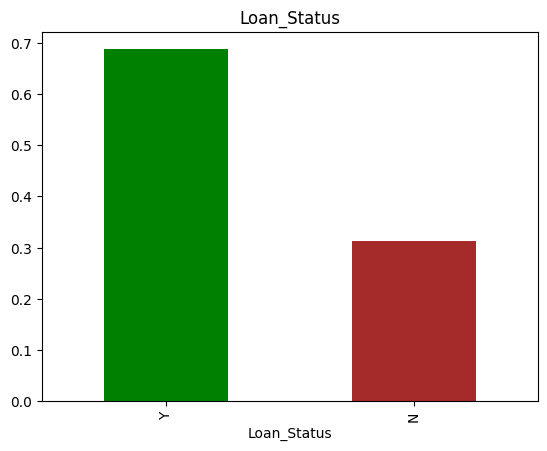

In [258]:
train["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status', color=["Green","Brown"])

The loan of 422(around 68.7%) people out of 614 was approved.

Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

#### Now lets check independent Variables too;

### Gender Column

In [259]:
train["Gender"].count()

np.int64(601)

In [260]:
train["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

- Among 601 person: Male : 489 Female : 112

In [261]:
train['Gender'].value_counts(normalize=True)*100

Gender
Male      81.364393
Female    18.635607
Name: proportion, dtype: float64

<Axes: title={'center': 'Gender'}, xlabel='Gender'>

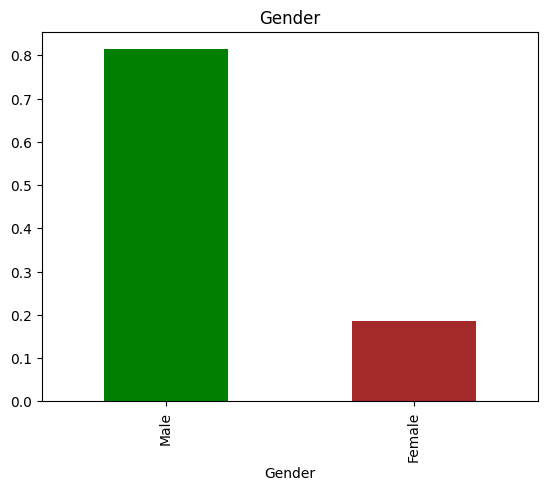

In [262]:
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender',color=["green","brown"])

- In our train dataset the "Gender" variable contain Male : 81% Female: 19%

### Married Column

In [263]:
train["Married"].count()

np.int64(611)

In [264]:
train["Married"].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [265]:
train['Married'].value_counts(normalize=True)*100

Married
Yes    65.139116
No     34.860884
Name: proportion, dtype: float64

<Axes: title={'center': 'Married'}, xlabel='Married'>

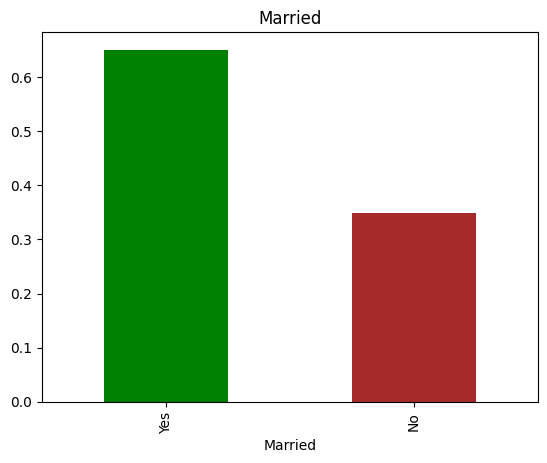

In [266]:
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married',color=["green","brown"])

Number of married people : 65%

Number of unmarried people : 35%

### Self_Employed Column

In [267]:
train["Self_Employed"].count()

np.int64(582)

In [268]:
train["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [269]:
train['Self_Employed'].value_counts(normalize=True)*100

Self_Employed
No     85.910653
Yes    14.089347
Name: proportion, dtype: float64

<Axes: title={'center': 'Self_Employed'}, xlabel='Self_Employed'>

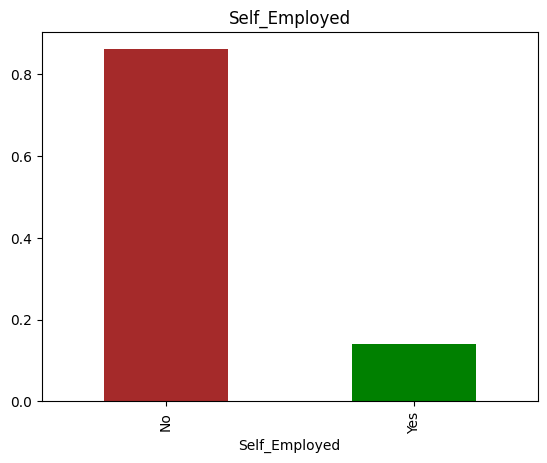

In [270]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed',color=["brown","green"])

Woah!
- Among 582 people only 14% are Self_Employed 
- rest of the 86% are Not_Self_Employed

### Credit_History Column

In [271]:
train["Credit_History"].count()

np.int64(564)

In [272]:
train["Credit_History"].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

- Repaid Debts : 475
- Not Repaid Debts : 89

That's good , most of the debts are repaid,

In [273]:
train['Credit_History'].value_counts(normalize=True)*100

Credit_History
1.0    84.219858
0.0    15.780142
Name: proportion, dtype: float64

<Axes: title={'center': 'Credit_History'}, xlabel='Credit_History'>

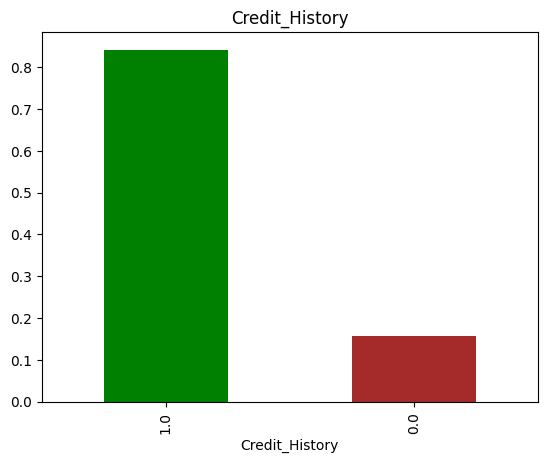

In [274]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History',color=["green","brown"])

Around 84% applicants have repaid their debts.

Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

### Ordinal Features

Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

#### Dependents Column

In [275]:
train['Dependents'].count()

np.int64(599)

In [276]:
train["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

Number of 0 Dependent : 345

Number of 1 Dependent : 102

Number of 2 Dependesnt : 101

Number of 3+ Dependent : 51

In [277]:
train['Dependents'].value_counts(normalize=True)*100

Dependents
0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: proportion, dtype: float64

<Axes: title={'center': 'Dependents'}, xlabel='Dependents'>

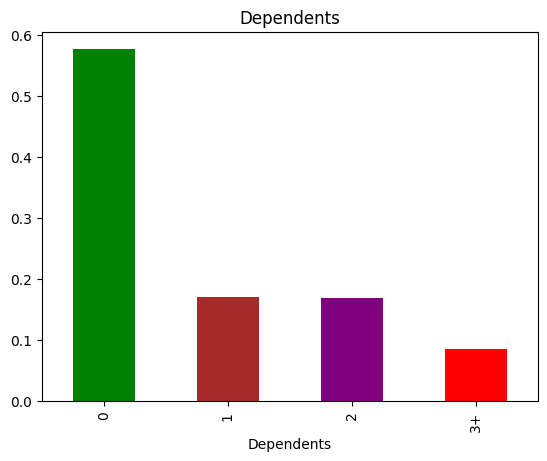

In [278]:
train['Dependents'].value_counts(normalize=True).plot.bar(title="Dependents",color=["green","brown","purple","Red"])


58% people have 0 dependent

17% people have 1 dependent

17% people have 2 dependent

8% people have 3+ dependent

#### Education Column

In [279]:
train["Education"].count()

np.int64(614)

In [280]:
train["Education"].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

People who are Graduated : 480

People who are not Graduated : 134

In [281]:
train["Education"].value_counts(normalize=True)*100

Education
Graduate        78.175896
Not Graduate    21.824104
Name: proportion, dtype: float64

<Axes: title={'center': 'Education'}, xlabel='Education'>

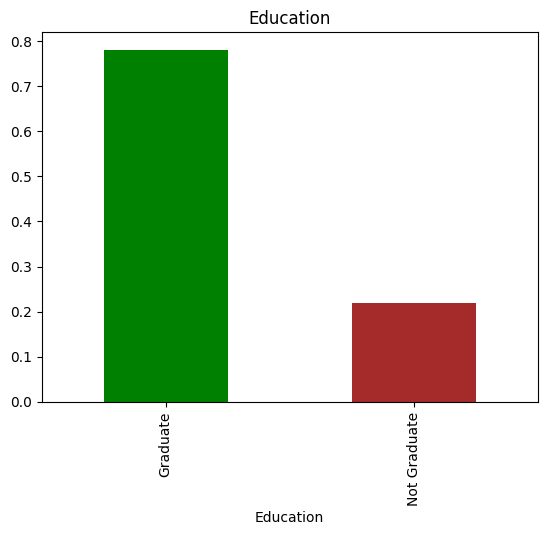

In [282]:
train["Education"].value_counts(normalize=True).plot.bar(title = "Education",color=["green","brown"])

- 78% are Graduated
- 22% are not Graduated

#### Property_Area Column

In [283]:
train["Property_Area"].count()

np.int64(614)

In [284]:
train["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

Total number of People : 614

People from Semiurban area : 233

People from Urban area : 202

People from Rural area : 179

In [285]:
train["Property_Area"].value_counts(normalize=True)*100

Property_Area
Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: proportion, dtype: float64

<Axes: title={'center': 'Property_Area'}, xlabel='Property_Area'>

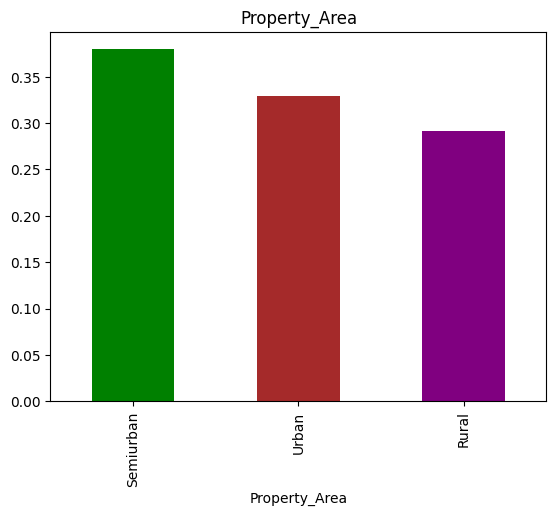

In [286]:
train["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area",color=["green","brown","purple"])

- Evenly Distributed:-

38% people from Semiurban area

33% people from Urban area

29% people from Rural area

## Distribution of the columns

### Numerical Independent Variables

#### ApplicantIncome Column

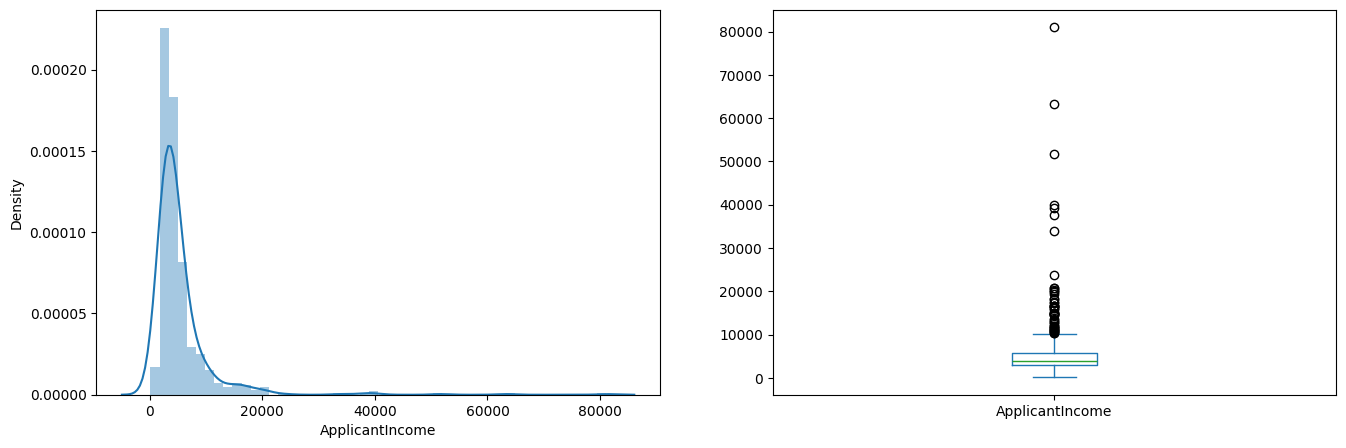

In [287]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["ApplicantIncome"])

plt.subplot(122)
train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

Clearly, the data is left skewed and Not Normal;
- most of the data in the distribution of applicant income is towards left
- The boxplot confirms the presence of a lot of outliers/extreme values. 
- This can be bvz of the income disparity in the society.

Let us seperate this data/people by their Education Level:

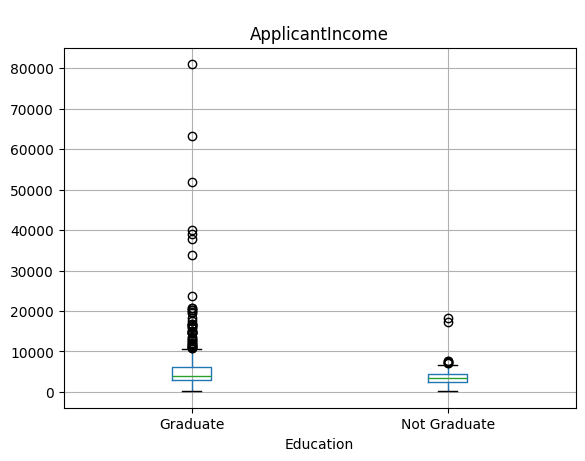

In [288]:
train.boxplot(column='ApplicantIncome',by="Education" )
plt.suptitle(" ")
plt.show()

- Outliers are present in Graduates data;

#### CoapplicantIncome Column

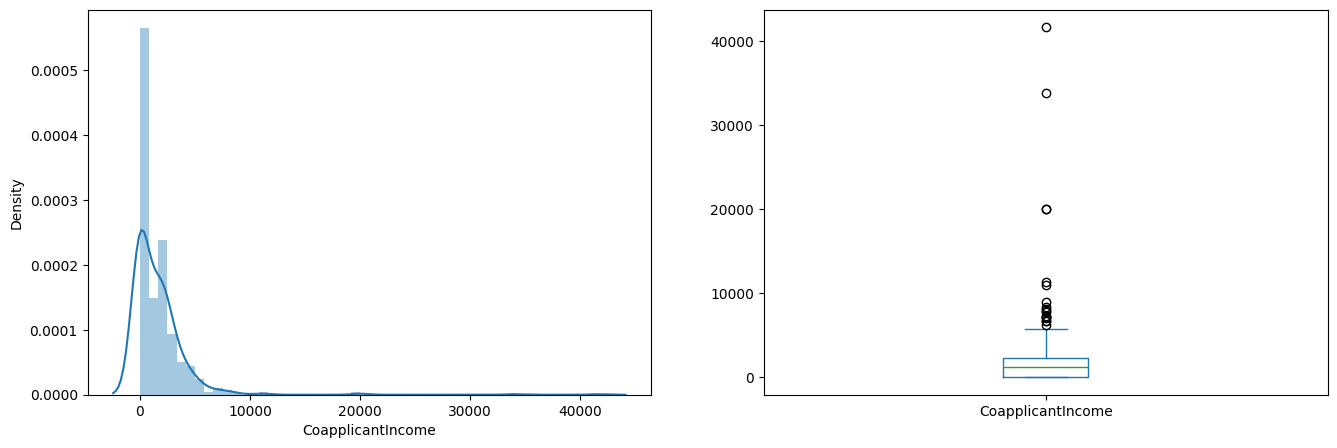

In [289]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["CoapplicantIncome"]);

plt.subplot(122)
train["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

#### LoanAmount Column

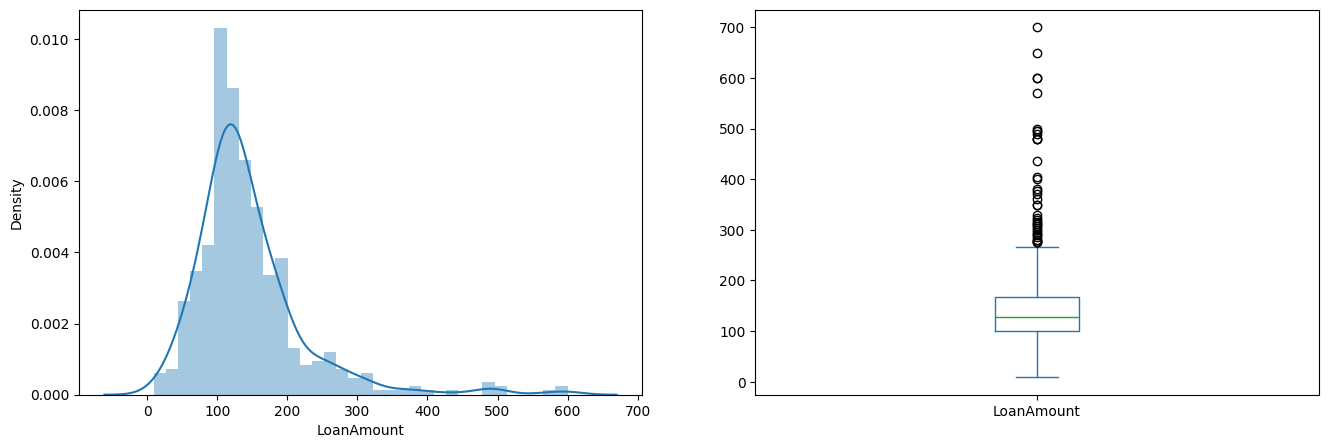

In [290]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

lot of outliers in this variable and the distribution is fairly normal.

#### LoanAmountTerm Column

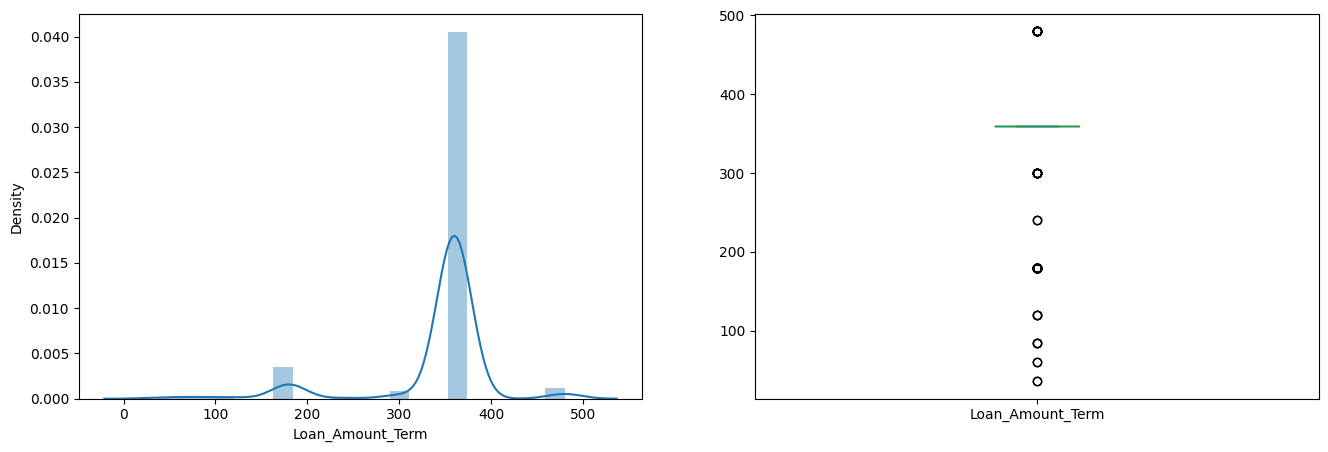

In [291]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df["Loan_Amount_Term"]);

plt.subplot(122)
df["Loan_Amount_Term"].plot.box(figsize=(16,5))
plt.show()

- similar to the LoanAmount Column

## Busting common norms, out there

First of all we will find the relation between target variable and categorical independent variables.

##### Relation between "Loan_Status" and "Gender"

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


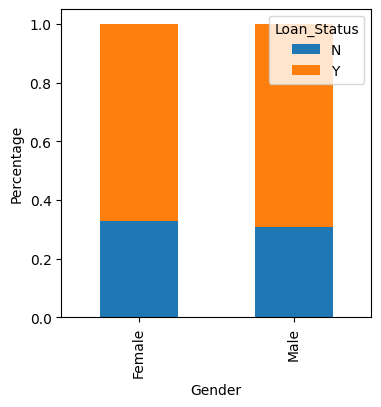

In [292]:
print(pd.crosstab(train["Gender"],train["Loan_Status"]))
Gender = pd.crosstab(train["Gender"],train["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

Proportion of Male applicants is higher for the approved loans.

##### Relation between "Loan_Status" and "Married"

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


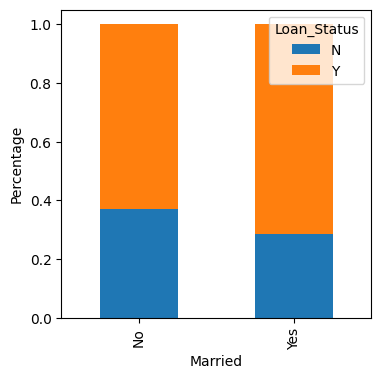

In [293]:
print(pd.crosstab(train["Married"],train["Loan_Status"]))
Married=pd.crosstab(train["Married"],train["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

Proportion of Married applicants is higher for the approved loans.

##### Relation between "Loan_Status" and "Dependents"

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


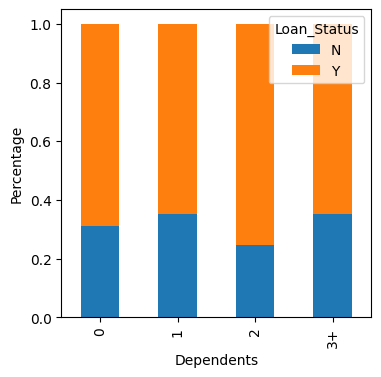

In [294]:
print(pd.crosstab(train['Dependents'],train["Loan_Status"]))
Dependents = pd.crosstab(train['Dependents'],train["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Dependents")
plt.ylabel("Percentage")
plt.show()

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

##### Relation between "Loan_Status" and "Education"

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


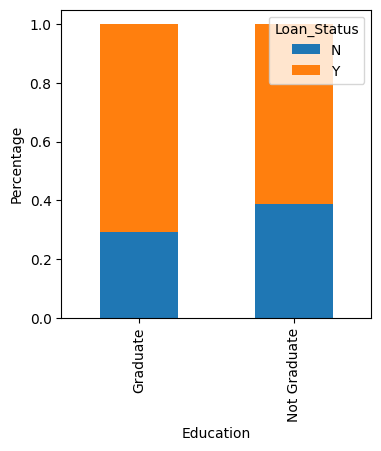

In [295]:
print(pd.crosstab(train["Education"],train["Loan_Status"]))
Education = pd.crosstab(train["Education"],train["Loan_Status"])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.show()

Proportion of Graduate applicants is higher for the approved loans.

##### Relation between "Loan_Status" and "Self_Employed"

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


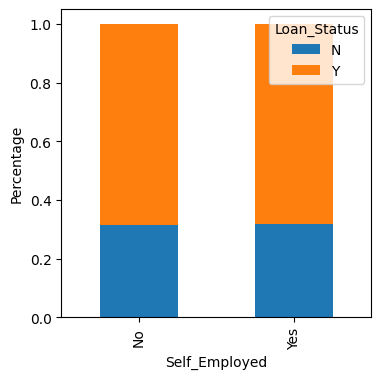

In [296]:
print(pd.crosstab(train["Self_Employed"],train["Loan_Status"]))
SelfEmployed = pd.crosstab(train["Self_Employed"],train["Loan_Status"])
SelfEmployed.div(SelfEmployed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Self_Employed")
plt.ylabel("Percentage")
plt.show()

There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

##### Relation between "Loan_Status" and "Credit_History"

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


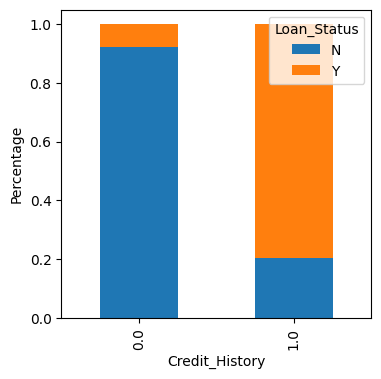

In [297]:
print(pd.crosstab(train["Credit_History"],train["Loan_Status"]))
CreditHistory = pd.crosstab(train["Credit_History"],train["Loan_Status"])
CreditHistory.div(CreditHistory.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Credit_History")
plt.ylabel("Percentage")
plt.show()

It seems people with credit history as 1 are more likely to get their loans approved.

##### Relation between "Loan_Status" and "Property_Area"

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


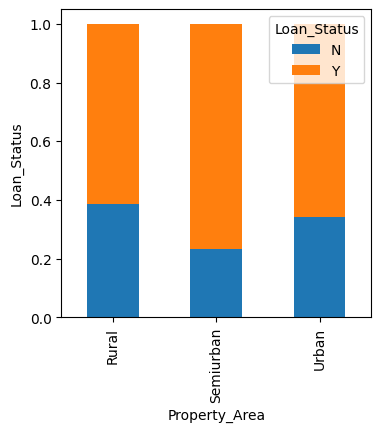

In [298]:
print(pd.crosstab(train["Property_Area"],train["Loan_Status"]))
PropertyArea = pd.crosstab(train["Property_Area"],train["Loan_Status"])
PropertyArea.div(PropertyArea.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Property_Area")
plt.ylabel("Loan_Status")
plt.show()

Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

## Checking general hypotheses:-

i)Applicants with high income should have more chances of loan approval.

ii)Applicants who have repaid their previous debts should have higher chances of loan approval.

##### Relation between "Loan_Status" and "Income" 

- We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.
- So that, we can, roughly, say that this is the avg income required for loan approval;

<Axes: xlabel='Loan_Status'>

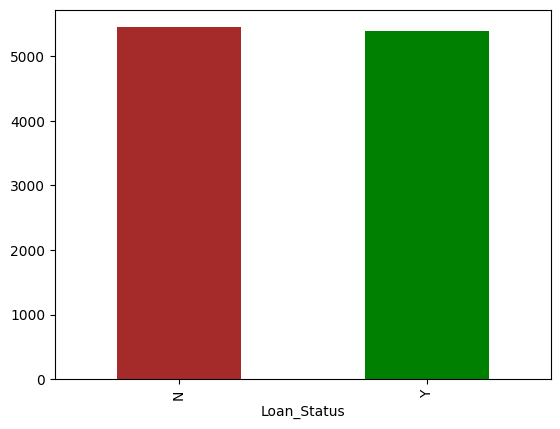

In [299]:
train.groupby("Loan_Status")['ApplicantIncome'].mean().plot.bar(color=["brown","green"])

We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [300]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

Loan_Status   N    Y
Income_bin          
Low          26   57
Average      51  123
High         32   79
Very high    39   73


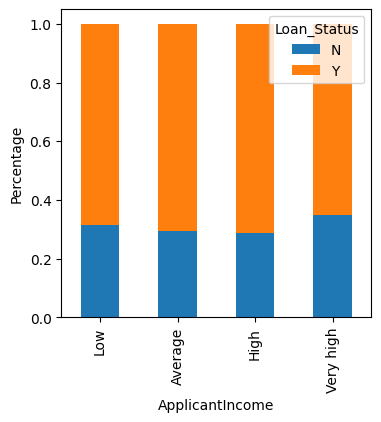

In [301]:
print(pd.crosstab(train["Income_bin"],train["Loan_Status"]))
Income_bin = pd.crosstab(train["Income_bin"],train["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

Well we can deduce that the Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

We will analyze the coapplicant income and loan amount variable in similar way.

In [302]:

bins=[0,1000,3000,42000]
group =['Low','Average','High']
train['CoapplicantIncome_bin']=pd.cut(df["CoapplicantIncome"],bins,labels=group)

Loan_Status             N    Y
CoapplicantIncome_bin         
Low                     3   15
Average                46  123
High                   24   53


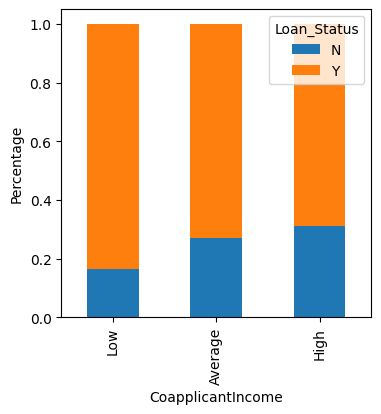

In [303]:
print(pd.crosstab(train["CoapplicantIncome_bin"],train["Loan_Status"]))
CoapplicantIncome_Bin = pd.crosstab(train["CoapplicantIncome_bin"],train["Loan_Status"])
CoapplicantIncome_Bin.div(CoapplicantIncome_Bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("CoapplicantIncome")
plt.ylabel("Percentage")
plt.show()
     

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval

In [304]:
train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

In [305]:
bins =[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train["TotalIncome_bin"]=pd.cut(train["TotalIncome"],bins,labels=group)

Loan_Status       N    Y
TotalIncome_bin         
Low              14   10
Average          32   87
High             65  159
Very High        81  166


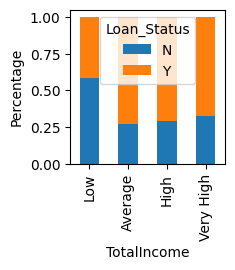

In [306]:
print(pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"]))
TotalIncome = pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"])
TotalIncome.div(TotalIncome.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(2,2))
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")
plt.show()

### Finding:->

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

iii)Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

iv)Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

In [307]:

bins = [0,100,200,700]
group=['Low','Average','High']
train["LoanAmount_bin"]=pd.cut(df["LoanAmount"],bins,labels=group)

Loan_Status      N    Y
LoanAmount_bin         
Low             38   86
Average         83  207
High            27   39


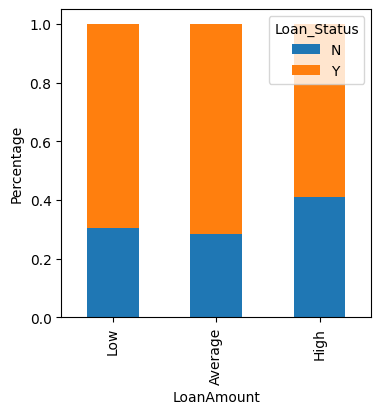

In [308]:

print(pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"]))
LoanAmount=pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"])
LoanAmount.div(LoanAmount.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("LoanAmount")
plt.ylabel("Percentage")
plt.show()

### Finding:-

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

### Basic Exploration Done

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable

In [309]:
train=train.drop(["Income_bin","CoapplicantIncome_bin","LoanAmount_bin","TotalIncome","TotalIncome_bin"],axis=1)

In [310]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. 

The variables with darker color means their correlation is more.

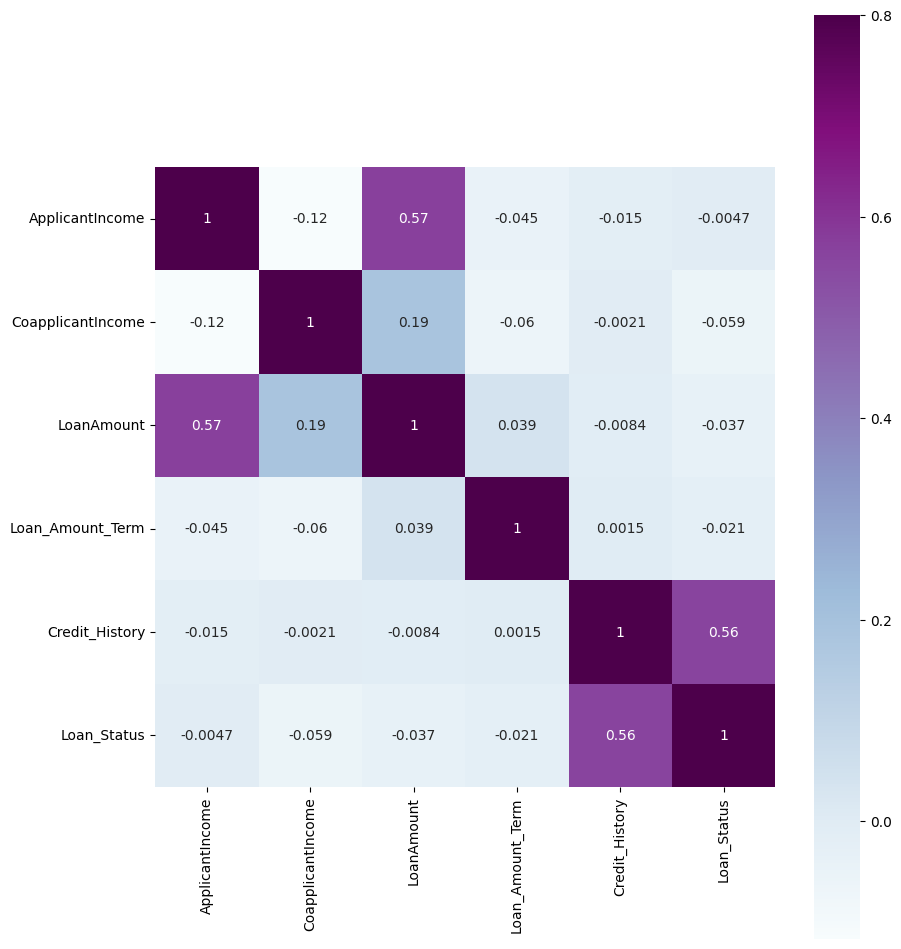

In [311]:
matrix = train.select_dtypes(include=['number']).corr()
#matrix = train.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);

Clearly, 
- the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status)

### Handling NaNs; Missing Value Imputation

In [312]:
# Checking for all the null values in Train dataset
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [313]:
# sns.barplot(train.isnull().sum(),color='brown')

#### For Categorical Columns; we will impute using Mode 

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features

In [314]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["Married"].fillna(train["Married"].mode()[0],inplace=True)
train['Dependents'].fillna(train["Dependents"].mode()[0],inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

In [315]:
train["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

- It can be seen that in loan amount term variable, the value of 360 is repeating the most, 512 times. 

So we will replace the missing values in this variable using the mode of this variable.

In [316]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)

In [317]:
train["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values.

We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [318]:
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

In [319]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Done!!

#### Let’s fill all the missing values in the test dataset too with the same approach

In [320]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [321]:
test["Gender"].fillna(test["Gender"].mode()[0],inplace=True)
test['Dependents'].fillna(test["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0],inplace=True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0],inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0],inplace=True)
test["LoanAmount"].fillna(test["LoanAmount"].median(),inplace=True)

In [322]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Done, this too;

- Check the distribution

<Axes: xlabel='LoanAmount', ylabel='Density'>

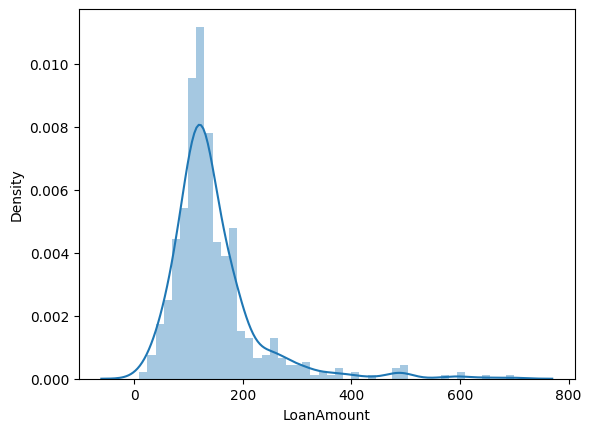

In [323]:
sns.distplot(train["LoanAmount"])

- Outliers, clearly;

<Axes: >

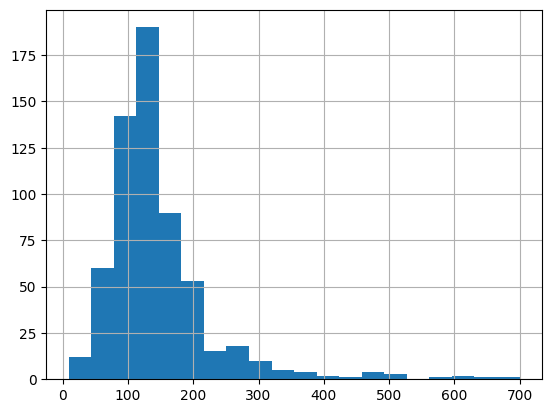

In [324]:
train['LoanAmount'].hist(bins=20)

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness.

One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values.

So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation.

We will do the similar changes to the test file simultaneously.

<Axes: >

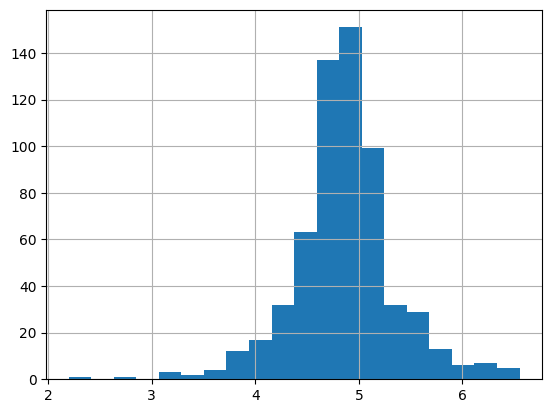

In [325]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

- Now it looks  normal;

<Axes: xlabel='LoanAmount_log', ylabel='Density'>

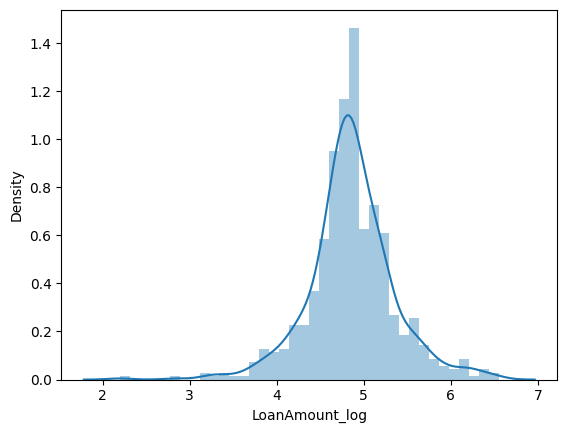

In [326]:
sns.distplot(train["LoanAmount_log"])

- yeah right; its a normal distribution now;


#### Checking in Test data too;

<Axes: >

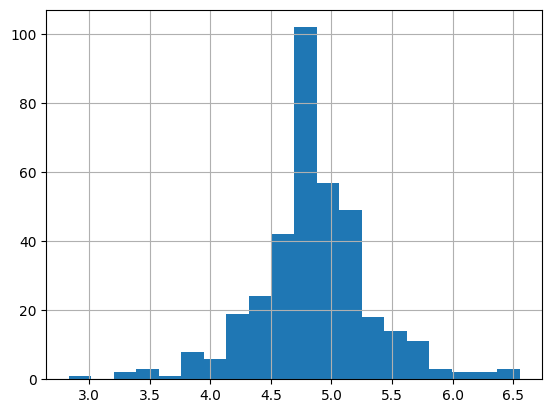

In [327]:
test["LoanAmount_log"]=np.log(train["LoanAmount"])
test['LoanAmount_log'].hist(bins=20)

<Axes: xlabel='LoanAmount_log', ylabel='Density'>

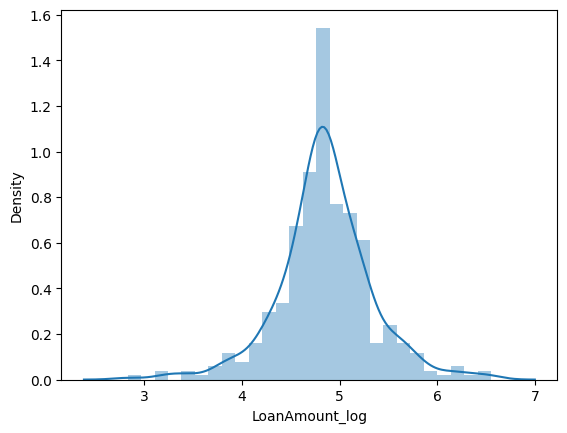

In [328]:
sns.distplot(test["LoanAmount_log"])

- Done; for both test and train dataset

### Feature Engineering

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

- Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.

- EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

- Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [329]:
train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

In [330]:
train[["TotalIncome"]].head()

,TotalIncome
0,5849.0
1,6091.0
2,3000.0
3,4941.0
4,6000.0


Creating "TotalIncome" Column via adding "ApplicantIncome" and "CoapplicantIncome" 

In [331]:
test["TotalIncome"]=test["ApplicantIncome"]+test["CoapplicantIncome"]

In [332]:
test[["TotalIncome"]].head()

,TotalIncome
0,5720
1,4576
2,6800
3,4886
4,3276


- Checking the distribution of the created column

<Axes: xlabel='TotalIncome', ylabel='Density'>

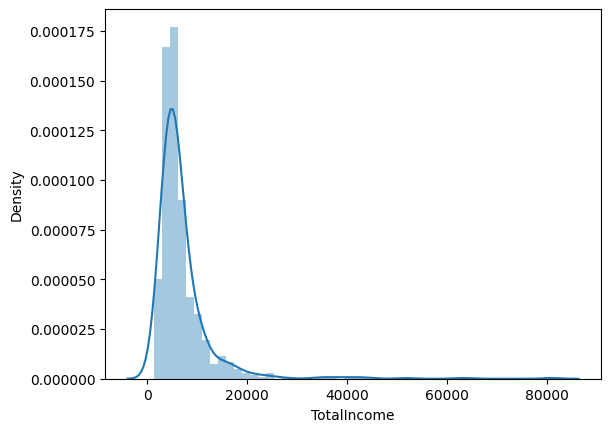

In [333]:
sns.distplot(train["TotalIncome"])

- well, right skewed; 

we can treat this using log transformation, 

<Axes: xlabel='TotalIncome_log', ylabel='Density'>

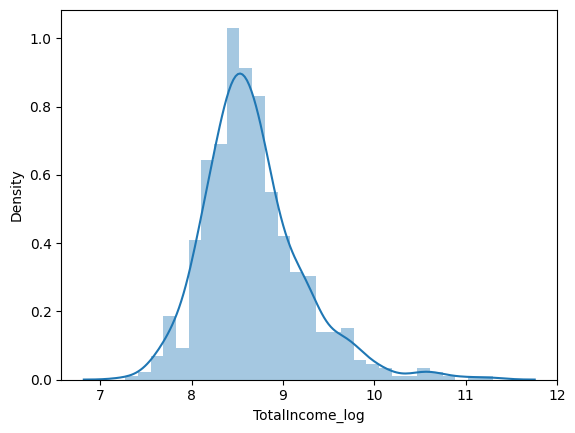

In [334]:
train["TotalIncome_log"]=np.log(train["TotalIncome"])
sns.distplot(train["TotalIncome_log"])

- fine now, almost normal

- chekcing in test dataset

<Axes: xlabel='TotalIncome', ylabel='Density'>

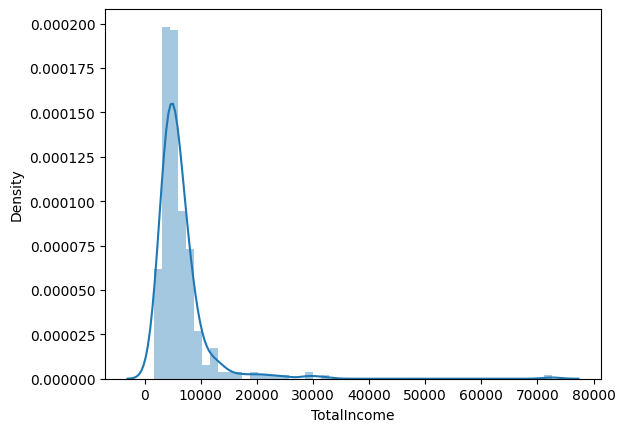

In [335]:
sns.distplot(test["TotalIncome"])

- same here too; right skewed.

- will follow the same, log transformation technique

<Axes: xlabel='TotalIncome_log', ylabel='Density'>

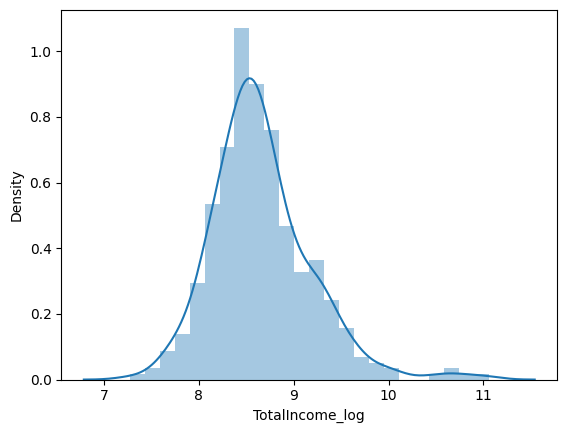

In [336]:
test["TotalIncome_log"] = np.log(train["TotalIncome"])
sns.distplot(test["TotalIncome_log"])

#### Creating "EMI" Feature/Column

- Amount divided by Term

In [337]:
train["EMI"]=train["LoanAmount"]/train["Loan_Amount_Term"]
test["EMI"]=test["LoanAmount"]/test["Loan_Amount_Term"]

In [338]:
train[["EMI"]].head()

,EMI
0,0.355556
1,0.355556
2,0.183333
3,0.333333
4,0.391667


In [339]:
test[["EMI"]].head()

,EMI
0,0.305556
1,0.350000
2,0.577778
3,0.277778
4,0.216667


Checking the distribution 

<Axes: xlabel='EMI', ylabel='Density'>

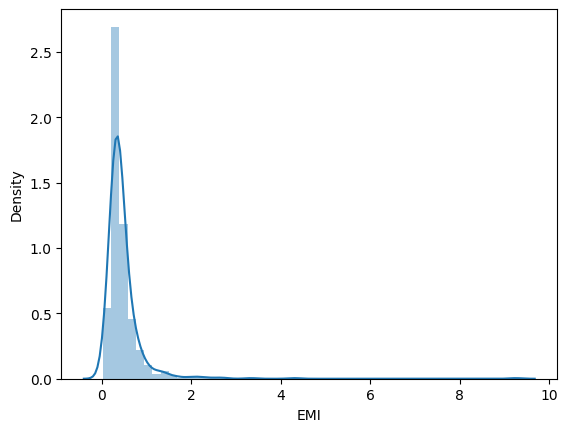

In [340]:
sns.distplot(train["EMI"])

<Axes: xlabel='EMI', ylabel='Density'>

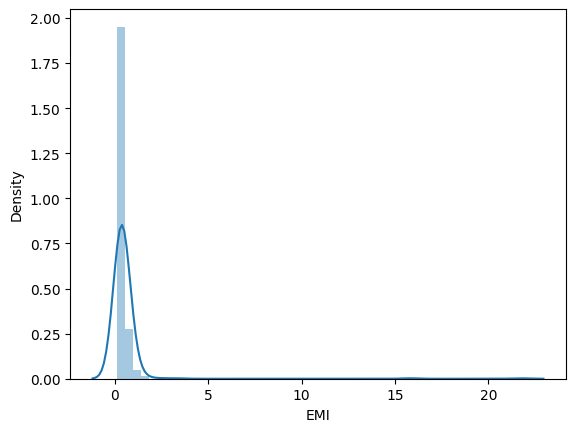

In [341]:
sns.distplot(test["EMI"])

#### Creating "Balance Income" Column

In [342]:
#test.head()
train["Balance_Income"] = train["TotalIncome"]-train["EMI"]*1000 # To make the units equal we multiply with 1000
test["Balance_Income"] = test["TotalIncome"]-test["EMI"]*1000

In [343]:
train[["Balance_Income"]].head()

,Balance_Income
0,5493.444444
1,5735.444444
2,2816.666667
3,4607.666667
4,5608.333333


In [344]:
test[["Balance_Income"]].head()

,Balance_Income
0,5414.444444
1,4226.000000
2,6222.222222
3,4608.222222
4,3059.333333


Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [345]:
train=train.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)
 

In [346]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,1,4.852030,5849.0,8.674026,0.355556,5493.444444
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,0,4.852030,6091.0,8.714568,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,1,4.189655,3000.0,8.006368,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4.787492,4941.0,8.505323,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,1,4.948760,6000.0,8.699515,0.391667,5608.333333


In [347]:
test = test.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [348]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,LP001015,Male,Yes,0,Graduate,No,1.0,Urban,4.852030,5720,8.674026,0.305556,5414.444444
1,LP001022,Male,Yes,1,Graduate,No,1.0,Urban,4.852030,4576,8.714568,0.350000,4226.000000
2,LP001031,Male,Yes,2,Graduate,No,1.0,Urban,4.189655,6800,8.006368,0.577778,6222.222222
3,LP001035,Male,Yes,2,Graduate,No,1.0,Urban,4.787492,4886,8.505323,0.277778,4608.222222
4,LP001051,Male,No,0,Not Graduate,No,1.0,Urban,4.948760,3276,8.699515,0.216667,3059.333333


Dropping the "Loan_Id", as it doesnt have any importance in here;

In [349]:
train = train.drop(columns=['Loan_ID'])
train=train.drop(columns=['TotalIncome'])
train.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,1,4.852030,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,0,4.852030,8.714568,0.355556,5735.444444
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1,4.189655,8.006368,0.183333,2816.666667
3,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4.787492,8.505323,0.333333,4607.666667
4,Male,No,0,Graduate,No,1.0,Urban,1,4.948760,8.699515,0.391667,5608.333333


In [350]:
test = test.drop(columns=['Loan_ID'])
test=test.drop(columns=['TotalIncome'])
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log,EMI,Balance_Income
0,Male,Yes,0,Graduate,No,1.0,Urban,4.852030,8.674026,0.305556,5414.444444
1,Male,Yes,1,Graduate,No,1.0,Urban,4.852030,8.714568,0.350000,4226.000000
2,Male,Yes,2,Graduate,No,1.0,Urban,4.189655,8.006368,0.577778,6222.222222
3,Male,Yes,2,Graduate,No,1.0,Urban,4.787492,8.505323,0.277778,4608.222222
4,Male,No,0,Not Graduate,No,1.0,Urban,4.948760,8.699515,0.216667,3059.333333


### Feature Encoding
Categorical Features

In [351]:
#train.info()
# train['Credit_History'].unique()

In [352]:
train = pd.get_dummies(
    train,
    columns=[
        "Gender",
        "Married",
        "Dependents",
        "Education",
        "Self_Employed",
        "Credit_History",
        "Property_Area"
    ],
    drop_first=True,    # optional, avoids dummy variable trap
    dtype=int   
)

train.head()

,Loan_Status,LoanAmount_log,TotalIncome_log,EMI,Balance_Income,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,1,4.852030,8.674026,0.355556,5493.444444,1,0,1,0,0,0,0,1,0,1
1,0,4.852030,8.714568,0.355556,5735.444444,1,1,0,1,0,0,0,1,0,0
2,1,4.189655,8.006368,0.183333,2816.666667,1,1,1,0,0,0,1,1,0,1
3,1,4.787492,8.505323,0.333333,4607.666667,1,1,1,0,0,1,0,1,0,1
4,1,4.948760,8.699515,0.391667,5608.333333,1,0,1,0,0,0,0,1,0,1


In [353]:
train.columns

Index(['Loan_Status', 'LoanAmount_log', 'TotalIncome_log', 'EMI',
       'Balance_Income', 'Gender_Male', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Credit_History_1.0', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

Doing the same for test dataset

In [354]:
test = pd.get_dummies(
    test,
    columns=[
        "Gender",
        "Married",
        "Dependents",
        "Education",
        "Self_Employed",
        "Credit_History",
        "Property_Area"
    ],
    drop_first=True,    # optional, avoids dummy variable trap
    dtype=int
)
test.head()

,LoanAmount_log,TotalIncome_log,EMI,Balance_Income,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,4.852030,8.674026,0.305556,5414.444444,1,1,1,0,0,0,0,1,0,1
1,4.852030,8.714568,0.350000,4226.000000,1,1,0,1,0,0,0,1,0,1
2,4.189655,8.006368,0.577778,6222.222222,1,1,0,0,1,0,0,1,0,1
3,4.787492,8.505323,0.277778,4608.222222,1,1,0,0,1,0,0,1,0,1
4,4.948760,8.699515,0.216667,3059.333333,1,0,1,0,0,1,0,1,0,1


Normalisation of the data

- Using MinMax Scaler

In [355]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train[["LoanAmount_log", "TotalIncome_log", "Balance_Income"]] = scaler.fit_transform(
    train[["LoanAmount_log", "TotalIncome_log", "Balance_Income"]]
)
train.head()

,Loan_Status,LoanAmount_log,TotalIncome_log,EMI,Balance_Income,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,1,0.609760,0.347590,0.355556,0.088805,1,0,1,0,0,0,0,1,0,1
1,0,0.609760,0.357654,0.355556,0.091765,1,1,0,1,0,0,0,1,0,0
2,1,0.457624,0.181853,0.183333,0.056069,1,1,1,0,0,0,1,1,0,1
3,1,0.594936,0.305712,0.333333,0.077973,1,1,1,0,0,1,0,1,0,1
4,1,0.631977,0.353918,0.391667,0.090211,1,0,1,0,0,0,0,1,0,1


In [356]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test[["LoanAmount_log", "TotalIncome_log", "Balance_Income"]] = scaler.fit_transform(test[["LoanAmount_log", "TotalIncome_log", "Balance_Income"]])
test.head()

,LoanAmount_log,TotalIncome_log,EMI,Balance_Income,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,0.543004,0.370195,0.305556,0.196719,1,1,1,0,0,0,0,1,0,1
1,0.543004,0.380913,0.350000,0.182280,1,1,0,1,0,0,0,1,0,1
2,0.364844,0.193680,0.577778,0.206534,1,1,0,0,1,0,0,1,0,1
3,0.525645,0.325593,0.277778,0.186924,1,1,0,0,1,0,0,1,0,1
4,0.569022,0.376934,0.216667,0.168105,1,0,1,0,0,1,0,1,0,1


we will drop our target variable from the train dataset and save it in another dataset.

dropping the target variable "Loan_Status"


#### Saving this train and test dataset for Web App

In [398]:
# Saving the preprocessed train and test data for future use
train.to_csv("data/train_preprocessed.csv", index=False)
test.to_csv("data/test_preprocessed.csv", index=False)

## Train Test Split

In [357]:
X=train.drop("Loan_Status",axis=1)

In [358]:
X.head()

,LoanAmount_log,TotalIncome_log,EMI,Balance_Income,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,0.609760,0.347590,0.355556,0.088805,1,0,1,0,0,0,0,1,0,1
1,0.609760,0.357654,0.355556,0.091765,1,1,0,1,0,0,0,1,0,0
2,0.457624,0.181853,0.183333,0.056069,1,1,1,0,0,0,1,1,0,1
3,0.594936,0.305712,0.333333,0.077973,1,1,1,0,0,1,0,1,0,1
4,0.631977,0.353918,0.391667,0.090211,1,0,1,0,0,0,0,1,0,1


- Saving target variable "Laon_Status" in another instance

In [359]:
y=train[["Loan_Status"]]

In [360]:
y.head() #quick cgeck

,Loan_Status
0,1
1,0
2,1
3,1
4,1


Train Test Split using sklearn

In [361]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

The dataset has been divided into training and validation part.

- 70% data will use for train the model and rest of the 30% data will use for checking validation of the model.

In [362]:
# train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']
# test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']


# Modelling

## 1. Logistic Regression

In [363]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [364]:
train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

In [365]:
# Training the Logistic Regression model (once instead of multiple times in loop)
logreg_clf = LogisticRegression(solver='liblinear')
logreg_clf.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [366]:
# Predict probabilities (again, only once instead of multiple times in loop)
train_proba = logreg_clf.predict_proba(x_train)[:,1]
test_proba  = logreg_clf.predict_proba(x_test)[:,1]

#### Logic Explanation:-

Note: I am not using the conventional Threshold Decisiion value of 0.5, as 0.5 is just a guess and not optimal.

So we will test many thresholds (0.1 to 0.9 with a jump of 0.1 obviously)

And at each threshold jump, we will check:-
- How many loans are approved?
- How many predicted approvals are correct?
- How does accuracy change?
- How does F1 score change?

Via this we will get a clear picture of how our model performs under different confidence.

In [367]:
# Sweep thresholds
for thresh in np.arange(0.1, 0.9, 0.1):

    # train predictions
    y_pred_train = (train_proba > thresh).astype(int)
    train_acc = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)

    # test predictions
    y_pred_test = (test_proba > thresh).astype(int)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)

    # store
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)

Another logic behind raising the threshold is that it;-

- makes approvals stricter 
- reduces false positives
- might increase false negatives (needs to be checked)
- changes F1 score and accuracy 
- changes business outcomes (lets see if it works in our case)
 (update*-> It worked, est threshold value was not 0.5 but 0.4)

In [368]:
## dataframe to store all the results

Threshold_logreg = {
    "Training Accuracy": train_accuracies, 
    "Test Accuracy": test_accuracies, 
    "Training F1": train_f1_scores, 
    "Test F1": test_f1_scores, 
    "Decision Threshold": thresholds
}

In [369]:
# Convert into a dataframe
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

In [370]:
best_thresh = Threshold_logreg_df.iloc[Threshold_logreg_df["Test F1"].idxmax()]["Decision Threshold"]
best_thresh

np.float64(0.4)

- Nice, we broke the 0.5 convention🥸

Also, Loans Prefer Lower Thresholds (Customer Acquisition)

Banks don't want to lose good borrowers. They prefer:

- catching MOST eligible people (high recall)

while controlling risk (acceptable precision)

Threshold=0.4 gives high recall with strong precision → best business trade-off.

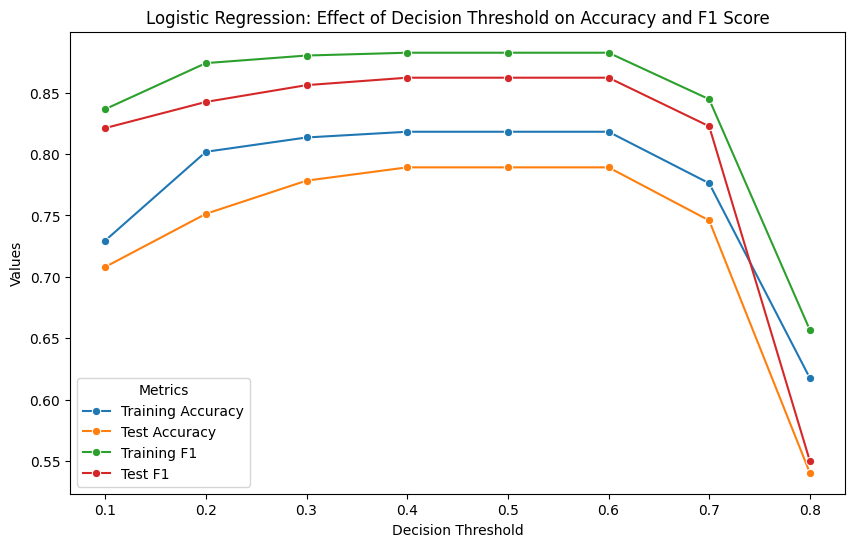

In [371]:
plot_df = Threshold_logreg_df.melt('Decision Threshold', var_name='Metrics', value_name="Values")
plt.figure(figsize=(10,6))
sns.lineplot(data=plot_df, x='Decision Threshold', y='Values', hue='Metrics', marker='o')
plt.title('Logistic Regression: Effect of Decision Threshold on Accuracy and F1 Score')
plt.show()

## Model Evaluation:-


In [372]:

thresh = 0.4 ### Threshold chosen from above Curves
y_pred_test_thresh = logreg_clf.predict_proba(x_test)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
yp=y_test.values.flatten()
pd.crosstab(yp, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.7891891891891892
Test F1 Score:  0.8621908127208481
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,24,37,61
1,2,122,124
All,26,159,185


In [373]:
## getting probabilities and predictions based on different thresholds

y_test_proba = logreg_clf.predict_proba(x_test)[:, 1]

# default 0.5
y_test_pred_05 = (y_test_proba >= 0.5).astype(int)

# your optimised threshold 0.4
best_thresh = 0.4
y_test_pred_04 = (y_test_proba >= best_thresh).astype(int)


In [374]:
## Compare 0.5 vs 0.4 (accuracy & F1)
from sklearn.metrics import accuracy_score, f1_score

print("=== Default Threshold 0.5 ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred_05))
print("F1 Score:", f1_score(y_test, y_test_pred_05))

print("\n=== Optimized Threshold 0.4 ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred_04))
print("F1 Score:", f1_score(y_test, y_test_pred_04))


=== Default Threshold 0.5 ===
Accuracy: 0.7891891891891892
F1 Score: 0.8621908127208481

=== Optimized Threshold 0.4 ===
Accuracy: 0.7891891891891892
F1 Score: 0.8621908127208481


In [375]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred_04)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix (Threshold = 0.4):")
print(cm)
print(f"\nTN: {tn}  FP: {fp}  FN: {fn}  TP: {tp}")


Confusion Matrix (Threshold = 0.4):
[[ 24  37]
 [  2 122]]

TN: 24  FP: 37  FN: 2  TP: 122


Interpretation in loan language:

TP → Approved and actually good borrowers 

TN → Rejected and actually risky borrowers 

FP → Approved but actually risky  (costly defaults, bad loans)

FN → Rejected but actually good (lost revenue, unhappy customers)

### Precision/Recall/F1

In [376]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred_04, digits=3))


              precision    recall  f1-score   support

           0      0.923     0.393     0.552        61
           1      0.767     0.984     0.862       124

    accuracy                          0.789       185
   macro avg      0.845     0.689     0.707       185
weighted avg      0.819     0.789     0.760       185



#### ROC Curve & AUC (ranking quality, threshold-free)

In [377]:
from sklearn.metrics import roc_curve, roc_auc_score

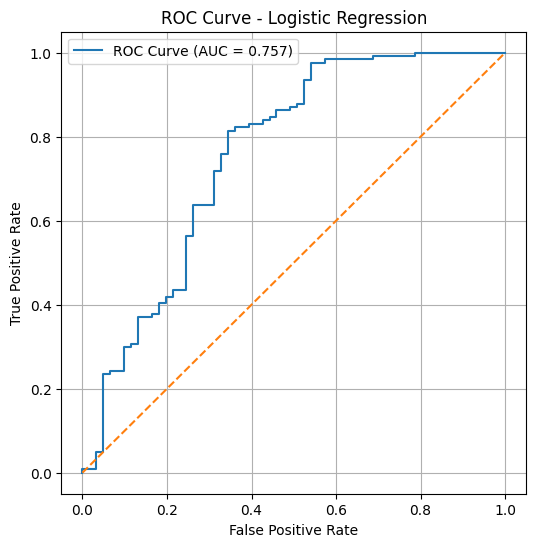

In [378]:
fpr, tpr, roc_thresh = roc_curve(y_test, y_test_proba)
auc = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.3f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

AUC is in range of 0.7~0.8, means it's a decent model;

### Precision Recall Curve (better for imbalanced data)
 used GPT for this part

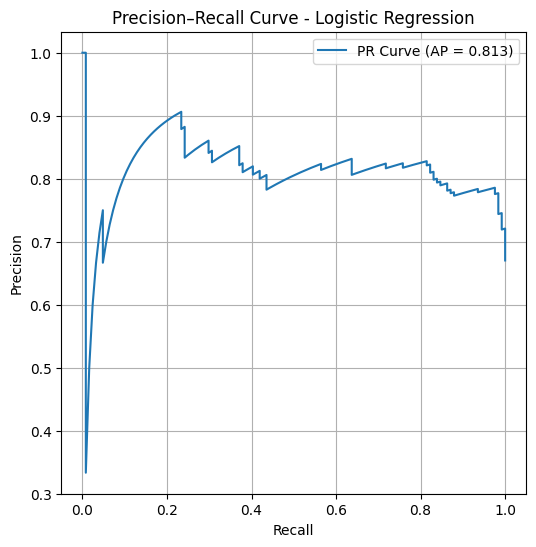

In [379]:
from sklearn.metrics import precision_recall_curve, average_precision_score

prec, rec, pr_thresh = precision_recall_curve(y_test, y_test_proba)
ap = average_precision_score(y_test, y_test_proba)

plt.figure(figsize=(6,6))
plt.plot(rec, prec, label=f"PR Curve (AP = {ap:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


##### New Concept-> Calibration (do probabilities mean what they say?)
Like to check If model says “0.7”, is it really ~70% likely?

Thanks to ChatGPT for this too;

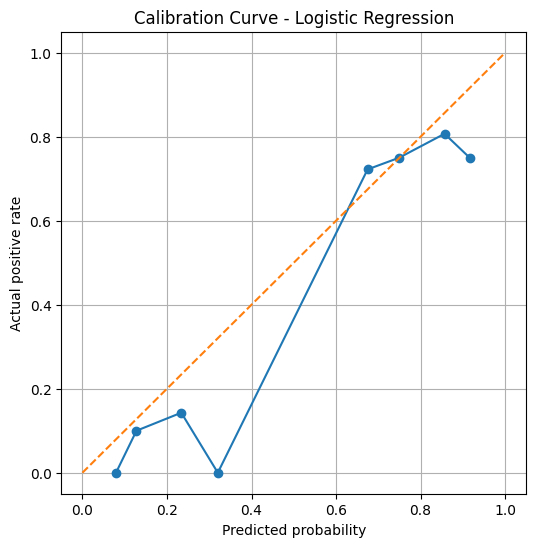

Brier Score (lower is better): 0.16134508272646214


In [380]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

prob_true, prob_pred = calibration_curve(y_test, y_test_proba, n_bins=10)

plt.figure(figsize=(6,6))
plt.plot(prob_pred, prob_true, marker="o")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("Predicted probability")
plt.ylabel("Actual positive rate")
plt.title("Calibration Curve - Logistic Regression")
plt.grid(True)
plt.show()

brier = brier_score_loss(y_test, y_test_proba)
print("Brier Score (lower is better):", brier)


## Feature Importance

As we know that in logistic regression, coefficients = log-odds impact.

In [381]:
feature_names = x_train.columns
coefs = logreg_clf.coef_[0]

importance_df = pd.DataFrame({
    "feature": feature_names,
    "coef": coefs
}).sort_values(by="coef", ascending=False)

importance_df.head(10)


,feature,coef
11,Credit_History_1.0,3.158354
12,Property_Area_Semiurban,0.777146
5,Married_Yes,0.310194
1,TotalIncome_log,0.216430
13,Property_Area_Urban,0.029969
2,EMI,0.019378
10,Self_Employed_Yes,-0.116395
4,Gender_Male,-0.166211
3,Balance_Income,-0.220698
8,Dependents_2,-0.307621


Lets visualise this

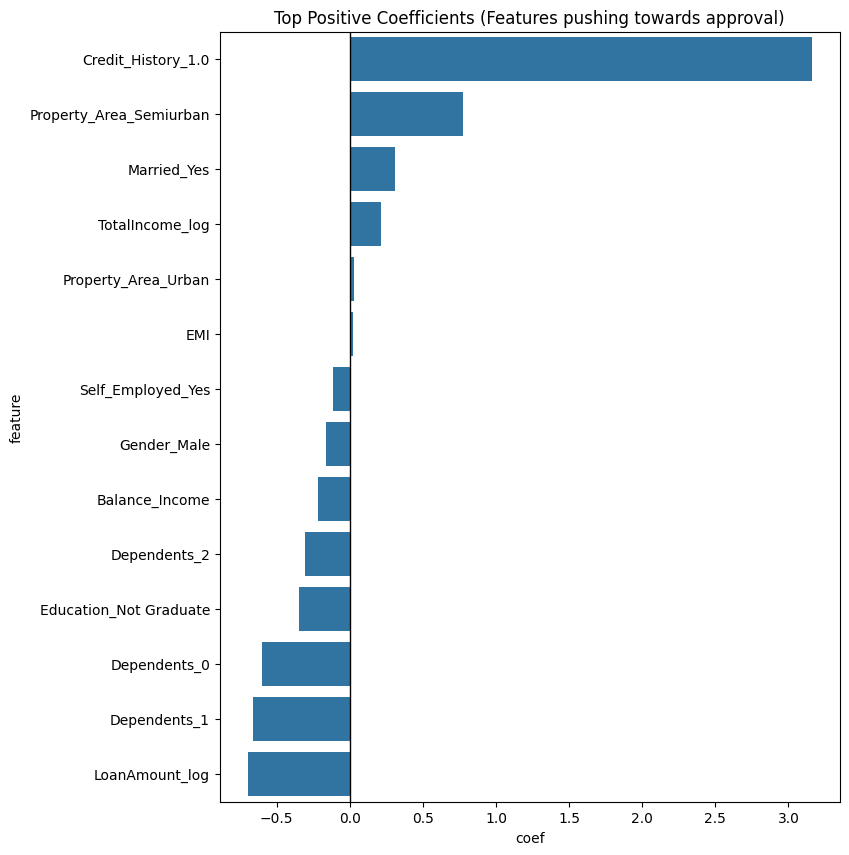

In [382]:
plt.figure(figsize=(8,10))
top_n = 15
sns.barplot(
    data=importance_df.head(top_n),
    x="coef", y="feature"
)
plt.title("Top Positive Coefficients (Features pushing towards approval)")
plt.axvline(0, color="black", linewidth=1)
plt.show()


Positive coef -> increases approval odds

Negative coef -> decreases approval odds

In [383]:
from sklearn.model_selection import cross_val_score

In [384]:
scores = cross_val_score(logreg_clf, x_train, y_train, cv=10, scoring='accuracy')
print(scores) #Accuracy of logistic regression on a different test fold.
print('')

print("-" * 5, "Mean Cross-Validation Accuracy:", "-" * 5)
print(scores.mean())

[0.76744186 0.88372093 0.8372093  0.8372093  0.79069767 0.81395349
 0.88372093 0.79069767 0.74418605 0.80952381]

----- Mean Cross-Validation Accuracy: -----
0.8158361018826135


#### Meaning->

the model performs best in some splits (0.88)

worst in others (0.76)

average performance ~81.5%

Accuracy might be biased via normal train test split of 80,20

Our score may depend on how the data was split and this is fixed by

Cross-validation, 

This is done by
Training and testing the model multiple times on different splits,
then averaging the scores to get a reliable performance estimate.

#### Logic behind "why Cross Validation" Score? 

CV helps smooth out:

- variance

- randomness in data distribution

- noise

- bias from a lucky/unlucky train-test split

Instead of evaluating the model on one random train-test split, K fold cross-validation evaluates the model on K different train test splits. 

This gives K accuracy values across different parts of the data. The average of these K scores is a much more reliable estimate of the model’s real performance. (81% which was better than without K-folds results)

### Error Analysis

In [385]:
test_df = x_test.copy()
test_df["y_true"] = y_test.values
test_df["y_pred"] = y_test_pred_04
test_df["proba"] = y_test_proba

fp_df = test_df[(test_df["y_true"] == 0) & (test_df["y_pred"] == 1)]
fn_df = test_df[(test_df["y_true"] == 1) & (test_df["y_pred"] == 0)]

print("False Positives:", fp_df.shape[0])
print("False Negatives:", fn_df.shape[0])


False Positives: 37
False Negatives: 2


### Interpretation->  Class 1 (Laon Rejected Case)

##### Precision (1) = 0.767

Out of all loans our model approved:

76.7% were actually good borrowers

23.3% were actually risky (false positives)

Meaning:
we are approving some risky borrowers → but not too many.

This matches our FP count: 37 FP

##### Recall (1) = 0.984

This is amazing🗿;
Out of all good borrowers:

98.4% WERE correctly approved, 

Meaning:
our model almost never misses a good borrower. (thanks btw)

This is why false negatives are only 2.

##### F1-score (1) = 0.862

This is strong.
It means:

Model maintains high approval accuracy, while approving almost all eligible borrowers

This is exactly what banks want,

### Interpretation->  Class 0 (Laon Accepted Case)

##### Precision (0) = 0.923

Among rejections:

92.3% were correctly rejected, Only 7.7% were mistakenly rejected (FN)

But notice somethin....

Recall (0) = 0.393

This is very low.

Meaning:

Model fails to catch a lot of risky borrowers

It only correctly identifies 39.3% of true risky borrowers

The rest are misclassified as approved → false positives

This matches our FP count: 37 FP

## Note:

Our actual Evaluation is what we've done earlier only, (above, with threshold 0.4 in our case) 

- precision         recall          f1-score        support

- 0             0.923           0.393           0.552        61
- 1             0.767           0.984           0.862       124

- accuracy       = 0.789
- false positives = 37
- false negatives = 2


### Cross-validation simply told us that 

Logistic Regression generalizes at ~81.8% accuracy on average.

## Business impact

My model gave
- False Positives (approve risky borrowers) = 37;

which can be a 'COSTLY ERROR' for a bank

But, False Positve is not extremely high relative to our dataset size.

And then,

- False Negatives (reject good borrowers) = 2

This is excellent. (thanks again)

Banks also hate rejecting good borrowers because:

They lose a good customer, which makes the 

Customer go to a competing bank, meaning

Revenue lost

Our model avoids this mistake very well;


## Logics

Q: Why I Refactored the Loop to Train Only Once

- WE could have trained the model at each threshold (from 0.1 to 0.9, actually I did , ut removed that code🙂;)

- But that was unnecessary and makes results unstable.

Instead I:-

train ONCE and only vary threshold:

- SAME model
- SAME probabilities
- Only the “cut point” changes
- True threshold curve

## Hyperparameter Tuning

Do I need to tune logistic regression even if it’s simple?

well, YES.
Logistic regression is very sensitive to

- the scaling of data
- the value of C
- the penalty
- noise in input features

correlated variables

Tuning can easily give:

- A bump in accuracy
- Better F1
- Reduced false positives
- Better balance between classes

But before tuning, we need to confirm our business goal, 
Like what do we want to improve/ optimise, 

In Bank/Loan Terms;
- If bank wants MAXIMUM GOOD BORROWER APPROVAL → Optimize Recall
- If bank wants MINIMUM RISK → Optimize Precision
- If you want best balance → Optimize F1
- For competition-style → Optimize Accuracy

Since Accuracy does not care about FP vs FN.
F1 balances precision and recall, which directly represent FP and FN.

So:

Precision ↓ → more risky borrowers getting approved

Recall ↓ → more good borrowers getting rejected

F1 forces the model to keep BOTH under control.

#### WE will go with the optimisation of F1

In [386]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Base model
logreg = LogisticRegression(max_iter=300)

# Hyperparameter search space
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']   # supports both L1 and L2
}


In [387]:
grid = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='f1',
    cv=10,
    n_jobs=-1
)

grid.fit(x_train, y_train)

print("Best Parameters Found:", grid.best_params_)
print("Best Cross-Validated F1 Score:", grid.best_score_)


Best Parameters Found: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validated F1 Score: 0.8828901448083034


In [388]:
best_C = grid.best_params_['C']
best_penalty = grid.best_params_['penalty']

best_logreg = LogisticRegression(
    C=best_C,
    penalty=best_penalty,
    solver='liblinear',
    max_iter=300
)

best_logreg.fit(x_train, y_train)


,penalty,'l1'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,300
,multi_class,'deprecated'


In [389]:
y_train_proba = best_logreg.predict_proba(x_train)[:, 1]
y_test_proba  = best_logreg.predict_proba(x_test)[:, 1]


In [390]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score

thresholds = np.arange(0.1, 0.9, 0.1)
f1_scores = []
acc_scores = []

for t in thresholds:
    preds = (y_test_proba >= t).astype(int)
    f1_scores.append(f1_score(y_test, preds))
    acc_scores.append(accuracy_score(y_test, preds))

best_thresh = thresholds[np.argmax(f1_scores)]
print("Best Threshold Found:", best_thresh)


Best Threshold Found: 0.5


#### Final Ealuation 

Evaluate on Test Set (Final Performance)

Now we'll redo our evaluation using the best model:

predicted probabilities

threshold = 0.4 (or re-tune threshold!)

confusion matrix

precision/recall/F1

FP/FN

ROC-AUC

PR-AUC

In [391]:
y_test_pred = (y_test_proba >= best_thresh).astype(int)
y_train_pred = (y_train_proba >= best_thresh).astype(int)

In [392]:
from sklearn.metrics import classification_report, confusion_matrix

print("FINAL TEST CLASSIFICATION REPORT:")
print(classification_report(y_test, y_test_pred, digits=3))

print("\nCONFUSION MATRIX (Test Set):")
print(confusion_matrix(y_test, y_test_pred))


FINAL TEST CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0      0.923     0.393     0.552        61
           1      0.767     0.984     0.862       124

    accuracy                          0.789       185
   macro avg      0.845     0.689     0.707       185
weighted avg      0.819     0.789     0.760       185


CONFUSION MATRIX (Test Set):
[[ 24  37]
 [  2 122]]


In [393]:
from sklearn.metrics import roc_auc_score, average_precision_score

roc_auc = roc_auc_score(y_test, y_test_proba)
pr_auc = average_precision_score(y_test, y_test_proba)

print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)


ROC-AUC: 0.7249471179270228
PR-AUC: 0.7888983871503583


In [394]:
cm = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cm.ravel()

print(f"True Negatives:  {tn}")
print(f"False Positives: {fp}")   # approving risky borrowers
print(f"False Negatives: {fn}")   # rejecting good borrowers
print(f"True Positives:  {tp}")


True Negatives:  24
False Positives: 37
False Negatives: 2
True Positives:  122


In [395]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': best_logreg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

feature_importance.head(10)


,Feature,Coefficient
11,Credit_History_1.0,1.642674
12,Property_Area_Semiurban,0.023679
2,EMI,0.000000
3,Balance_Income,0.000000
0,LoanAmount_log,0.000000
1,TotalIncome_log,0.000000
5,Married_Yes,0.000000
4,Gender_Male,0.000000
6,Dependents_0,0.000000
7,Dependents_1,0.000000


## Wise _ words of Bhavesh Gupta🙂;

Baseline (before tuning) and tuned model both produce:

Very high recall for class 1 (good borrowers)

Moderate precision for class 1

Low recall for class 0

Similar accuracy (~0.78–0.82 range)

Similar ROC-AUC (~0.72)

Similar PR-AUC (~0.78–0.79)

Same confusion matrix shape (FP ≫ FN)

This tells us something VERY CLEAR:

Our dataset + logistic regression have reached their natural limit.

Tuning cannot push it further. So we should we make a pause in here, or atleast I , based on my current knowledge, have to!

Thank you🫡

## Final Model Summary: Logistic Regression

=== FINAL MODEL SUMMARY ===


,Metric,Score
0,Cross-Val Accuracy,0.818
1,Test Accuracy,0.789
2,Precision (Class 1),0.767
3,Recall (Class 1),0.984
4,F1 Score (Class 1),0.862


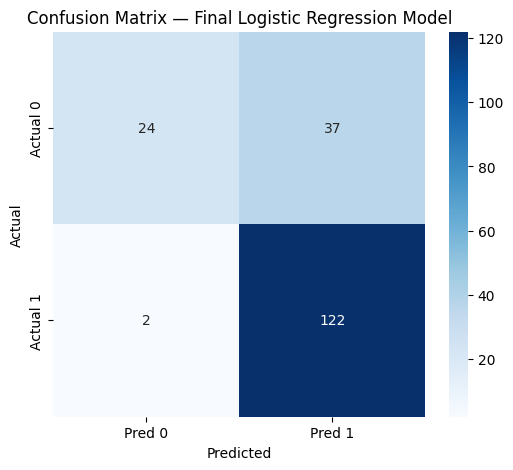


=== INTERPRETATION ===
True Negatives : 24  → Correctly rejected risky borrowers
False Positives: 37  → Risky borrowers incorrectly approved (costly)
False Negatives: 2  → Good borrowers rejected (very low = excellent)
True Positives : 122  → Correctly approved good borrowers

Model Summary:
- Cross-validated accuracy is 81.8%, showing strong generalization.
- Final test accuracy is 78.9%.
- Recall for approved borrowers (Class 1) is extremely high, meaning almost all good borrowers are approved.
- False negatives are only 2, which is excellent.
- False positives are 37, which is acceptable given threshold preference for higher recall.
- The model is optimised for approving good borrowers while controlling risk, yess the trade-off is always there.


In [396]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# ===== FINAL METRICS =====
cv_accuracy = 0.818   # your 10-fold CV accuracy
test_accuracy = 0.789
precision_1 = 0.767
recall_1 = 0.984
f1_1 = 0.862

cm = np.array([[24, 37],
               [2, 122]])

# ===== METRICS TABLE =====
metrics_df = pd.DataFrame({
    "Metric": ["Cross-Val Accuracy", "Test Accuracy", "Precision (Class 1)", "Recall (Class 1)", "F1 Score (Class 1)"],
    "Score": [cv_accuracy, test_accuracy, precision_1, recall_1, f1_1]
})

print("=== FINAL MODEL SUMMARY ===")
display(metrics_df)

# ===== CONFUSION MATRIX =====
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix — Final Logistic Regression Model")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# ===== INTERPRETATION TEXT =====
print("\n=== INTERPRETATION ===")
print(f"True Negatives : {cm[0,0]}  → Correctly rejected risky borrowers")
print(f"False Positives: {cm[0,1]}  → Risky borrowers incorrectly approved (costly)")
print(f"False Negatives: {cm[1,0]}  → Good borrowers rejected (very low = excellent)")
print(f"True Positives : {cm[1,1]}  → Correctly approved good borrowers")

print("\nModel Summary:")
print(f"- Cross-validated accuracy is {cv_accuracy*100:.1f}%, showing strong generalization.")
print(f"- Final test accuracy is {test_accuracy*100:.1f}%.")
print("- Recall for approved borrowers (Class 1) is extremely high, meaning almost all good borrowers are approved.")
print("- False negatives are only 2, which is excellent.")
print("- False positives are 37, which is acceptable given threshold preference for higher recall.")
print("- The model is optimised for approving good borrowers while controlling risk, yess the trade-off is always there.")



### Note-> WE can aslo drop this Hyperparameter tuning part, 
I am just keeping it for now; 

In [397]:
import joblib

# 1. Final trained model
final_model = best_logreg          # whatever you called it

# 2. Final decision threshold
final_threshold = 0.4              # or the value you used

# 3. Exact feature order used during training
feature_names = list(x_train.columns)

# 4. If you used a scaler (e.g., StandardScaler or MinMaxScaler) on x_train:
#    If NOT, set scaler = None or just skip it.
scaler = scaler   # change this if you actually used a scaler

bundle = {
    "model": final_model,
    "threshold": final_threshold,
    "feature_names": feature_names,
    "scaler": scaler,
}

joblib.dump(bundle, "loan_logreg_model.pkl")
print("✅ Saved model bundle to loan_logreg_model.pkl")


✅ Saved model bundle to loan_logreg_model.pkl


# Thank you 🫡